In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [11]:
crt_dataset = './Trimmed_MSD/training/labels/'

In [12]:
from glob import glob

In [13]:
a = torch.load(f'{crt_dataset}patient_42.pt')

a.min(), a.max(), a.shape

(metatensor(0.), metatensor(1.), torch.Size([1, 512, 512, 115]))

In [14]:
files = glob(crt_dataset + '*.pt')

In [15]:
cummulative = np.zeros((512, 512))

In [25]:
for file in files:
    label = torch.load(file)

    cummulative += label[0].sum(axis=2).numpy()

In [27]:
import pickle as pkl

with open('../msd_eda1_computational_effort_training.pkl', 'rb') as f:
    binning_volume_tr, _, bins_2d_tr, _, _, _ = pkl.load(f)

In [30]:
print(bins_2d_tr.shape)

(51, 512, 512)


In [31]:
cummulative_bins_2d = bins_2d_tr.sum(axis=0)

Text(0.5, 1.0, 'Full train heatmap')

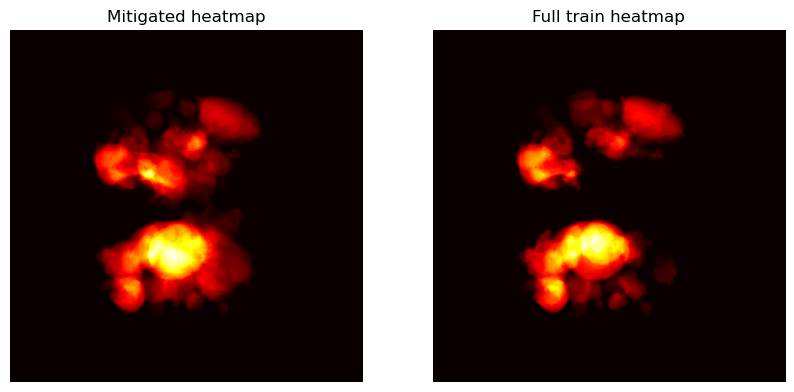

In [34]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cummulative, cmap='hot')
ax[0].axis('off')
ax[0].set_title('Mitigated heatmap')
ax[1].imshow(np.flip(cummulative_bins_2d, axis=0), cmap='hot')
ax[1].axis('off')
ax[1].set_title('Full train heatmap')

